## Experiment Tracking for Regression Algorithm

### Import libraries

In [1]:
import pandas as pd
pd.options.display.max_columns=31
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [2]:
df=pd.read_csv("data\\cars.csv")
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7


### Columns information

- manufacturer_name - The name of car manufacturer.
- model_name- The name of the model.
- transmission - Type of the transmission.
- color - Body color
- odometer_value - Odometer state in kilometers.
- year_produced - The year the car has been produced.
- engine_fuel - Fuel type of the engine.
- engine_has_gas - Is the car equipped with propane tank and tubing?
- engine_type - Engine type.
- engine_capacity - The capacity of the engine in liters, numerical column.
- body_type - Type of the body (hatchback, sedan, etc.
- has_warranty - Does the car have warranty?
- state - New/owned/emergency. Emergency means the car has been damaged, sometimes severely.
- drivetrain - Front/rear/all drivetrain, categorical column.
- price_usd - The price of a car as listed in the catalog in USD.
- is_exchangeable - If is_exchangeable is True the owner of the car is ready to exchange this car to other cars with little or no additional payment.
- location_region - Categorical column, location_region is a region in Belarus where the car is listed for sale.
- number_of_photos - Number of photos the car has. numerical
- up_counter - Number of times the car has been upped, numerical.
- feature_0 - Is the option like alloy wheels, conditioner, etc. is present in the car.
- feature_1 - Is the option like alloy wheels, conditioner, etc. is present in the car.
- feature_2 - Is the option like alloy wheels, conditioner, etc. is present in the car.
- feature_3 - Is the option like alloy wheels, conditioner, etc. is present in the car.
- feature_4 - Is the option like alloy wheels, conditioner, etc. is present in the car.
- feature_5 - Is the option like alloy wheels, conditioner, etc. is present in the car.
- feature_6 - Is the option like alloy wheels, conditioner, etc. is present in the car.
- feature_7 - Is the option like alloy wheels, conditioner, etc. is present in the car.
- feature_8 - Is the option like alloy wheels, conditioner, etc. is present in the car.
- feature_9 - Is the option like alloy wheels, conditioner, etc. is present in the car.
- duration_listed - Number of days the car is listed in the catalog.

### Data understanding

In [6]:
df.shape

(38531, 30)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
odometer_value,38531.0,248864.638447,136072.376530,0.0,158000.0,250000.0,325000.0,1000000.0
year_produced,38531.0,2002.943734,8.065731,1942.0,1998.0,2003.0,2009.0,2019.0
engine_capacity,38521.0,2.055161,0.671178,0.2,1.6,2.0,2.3,8.0
price_usd,38531.0,6639.971021,6428.152018,1.0,2100.0,4800.0,8990.0,50000.0
number_of_photos,38531.0,9.649062,6.093217,1.0,5.0,8.0,12.0,86.0
up_counter,38531.0,16.306091,43.286933,1.0,2.0,5.0,16.0,1861.0
duration_listed,38531.0,80.577249,112.826569,0.0,23.0,59.0,91.0,2232.0


In [12]:
df.describe(include='object')

,manufacturer_name,model_name,transmission,color,engine_fuel,engine_type,body_type,state,drivetrain,location_region
count,38531,38531,38531,38531,38531,38531,38531,38531,38531,38531
unique,55,1118,2,12,6,3,12,3,3,6
top,Volkswagen,Passat,mechanical,black,gasoline,gasoline,sedan,owned,front,Минская обл.
freq,4243,1423,25633,7705,24065,25647,13011,37723,27746,24230


### Missing Values

In [13]:
df.isna().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64

#### In this huge dataset have just 10 null values so its better to drop them.

In [3]:
df.dropna(inplace=True, axis=0)

### Duplicate row

In [15]:
df.duplicated().sum()

40

#### Drop duplicate rows

In [4]:
df.drop_duplicates(inplace=True)

### Exploratory Data Analysis

### Relation between target variable and numerical features

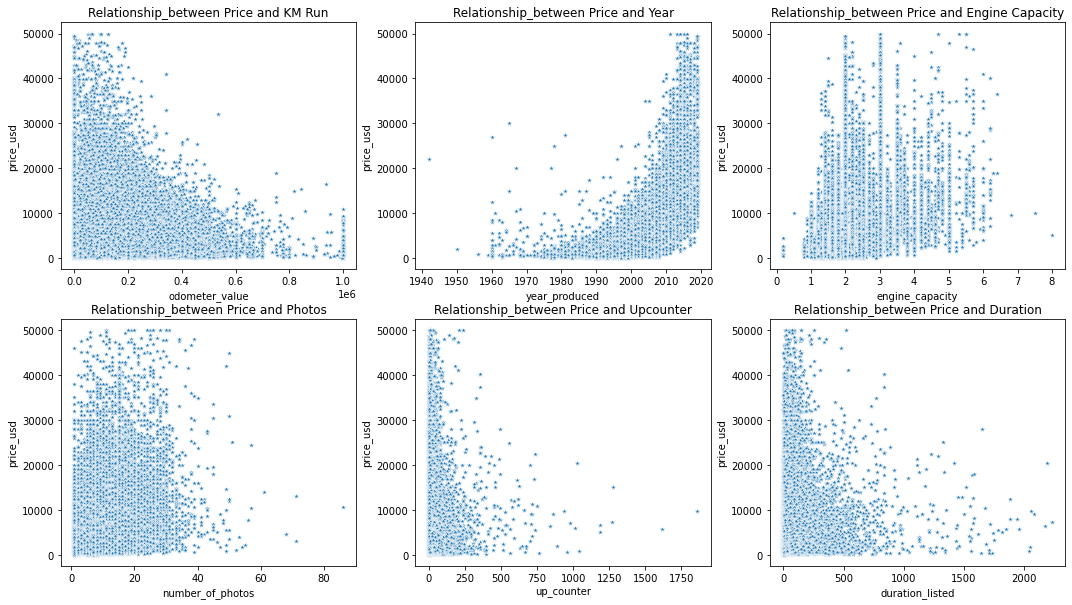

In [31]:
plt.figure(figsize=(18,10))
plt.subplot(231)
sns.scatterplot(x="odometer_value", y="price_usd", data=df, marker="*")
plt.title("Relationship_between Price and KM Run");

plt.subplot(232)
sns.scatterplot(x="year_produced", y="price_usd", data=df, marker="*")
plt.title("Relationship_between Price and Year");

plt.subplot(233)
sns.scatterplot(x="engine_capacity", y="price_usd", data=df, marker="*")
plt.title("Relationship_between Price and Engine Capacity");

plt.subplot(234)
sns.scatterplot(x="number_of_photos", y="price_usd", data=df, marker="*")
plt.title("Relationship_between Price and Photos");

plt.subplot(235)
sns.scatterplot(x="up_counter", y="price_usd", data=df, marker="*")
plt.title("Relationship_between Price and Upcounter");

plt.subplot(236)
sns.scatterplot(x="duration_listed", y="price_usd", data=df, marker="*")
plt.title("Relationship_between Price and Duration");

### Relationship between Target variable and Categorical features

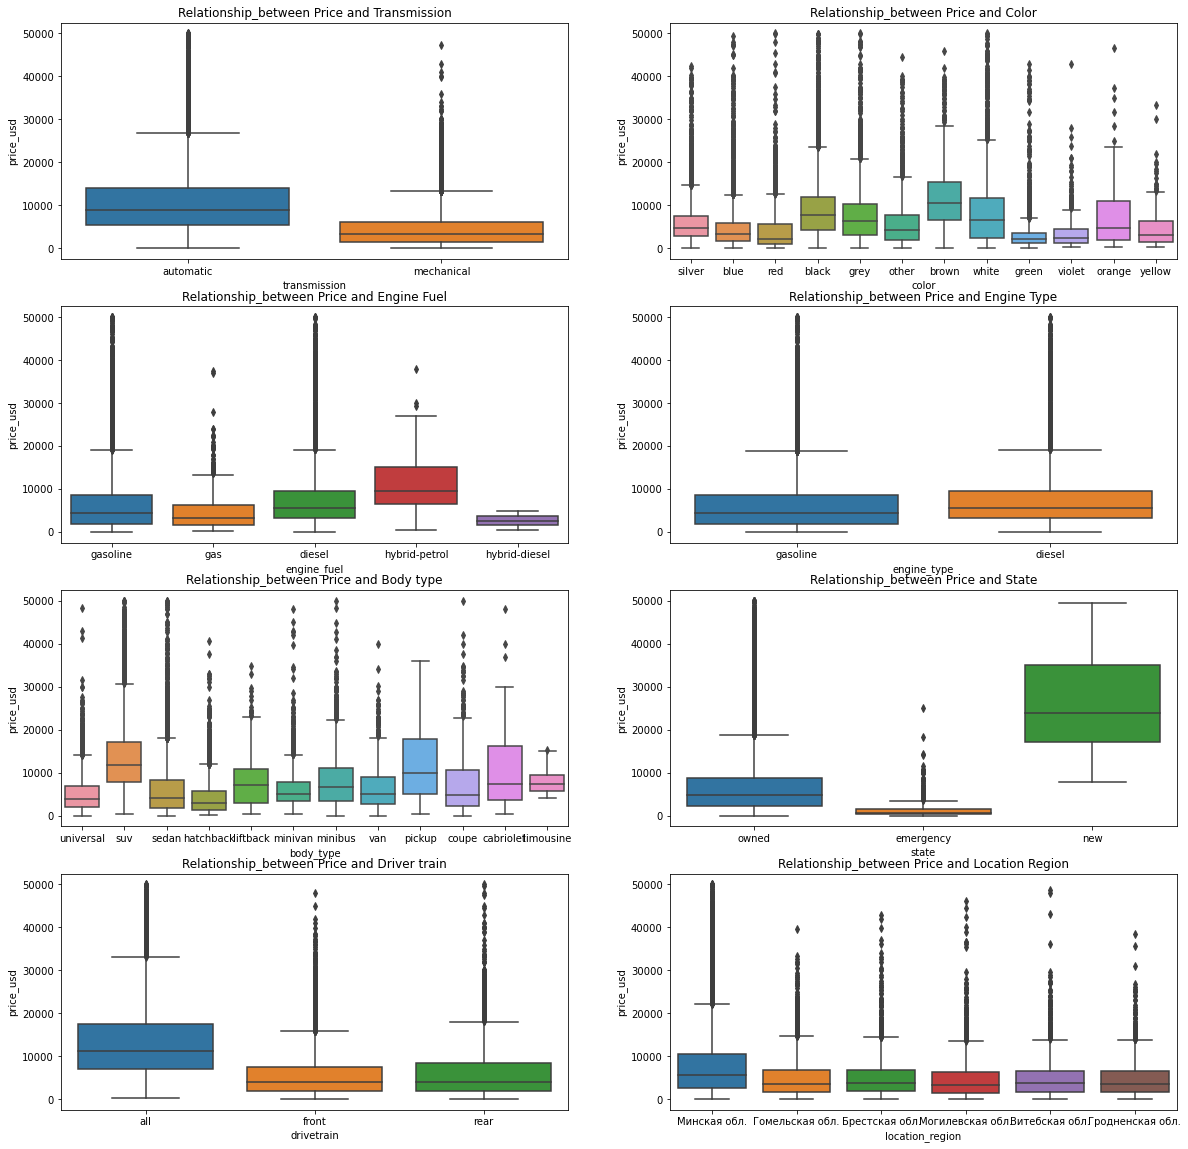

In [30]:
plt.figure(figsize=(20,20))
plt.subplot(421)
sns.boxplot(x="transmission", y="price_usd", data=df)
plt.title("Relationship_between Price and Transmission");

plt.subplot(422)
sns.boxplot(x="color", y="price_usd", data=df)
plt.title("Relationship_between Price and Color");

plt.subplot(423)
sns.boxplot(x="engine_fuel", y="price_usd", data=df)
plt.title("Relationship_between Price and Engine Fuel");

plt.subplot(424)
sns.boxplot(x="engine_type", y="price_usd", data=df)
plt.title("Relationship_between Price and Engine Type");

plt.subplot(425)
sns.boxplot(x="body_type", y="price_usd", data=df)
plt.title("Relationship_between Price and Body type");

plt.subplot(426)
sns.boxplot(x="state", y="price_usd", data=df)
plt.title("Relationship_between Price and State");

plt.subplot(427)
sns.boxplot(x="drivetrain", y="price_usd", data=df)
plt.title("Relationship_between Price and Driver train");

plt.subplot(428)
sns.boxplot(x="location_region", y="price_usd", data=df)
plt.title("Relationship_between Price and Location Region");

### Drop higher dimension column and columns with Boolean data type

In [5]:
df.drop(['manufacturer_name','model_name','feature_0', 'feature_1','feature_2','feature_3','feature_4','feature_5','feature_6',
        'feature_7','feature_8','feature_9'], axis=1, inplace=True)

In [6]:
data=df.copy()
data.head()

,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed
0,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,16
1,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,83
2,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,151
3,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,86
4,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,7


In [7]:
data.to_csv("data//clean_data_cars.csv", index=False)

### Seperate input and output features

In [8]:
X=data.drop('price_usd', axis=1)
y=data['price_usd']

### Split into train test split

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=0)

### Preprocessing

### Transforming X train data

#### Transform categorical data

In [10]:
cat_col=['transmission','color','year_produced','engine_fuel','engine_has_gas','engine_type','body_type','has_warranty','state','drivetrain','is_exchangeable','location_region']
cat_col_df=x_train[cat_col].astype('object')

In [11]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
ohe=OneHotEncoder(handle_unknown='infrequent_if_exist')
ohe=ohe.fit(cat_col_df)
cat_col_tf=ohe.transform(cat_col_df).toarray()
cat_col_tf[:1]

array([[0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
        0., 0.]])

#### Transform numerical columns

In [12]:
from sklearn.preprocessing import StandardScaler
num_col=['odometer_value','engine_capacity','number_of_photos','up_counter','duration_listed']
num_col_df=x_train[num_col]
std=StandardScaler()
std=std.fit(num_col_df)
num_col_tf=std.transform(num_col_df)
num_col_tf[:1]

array([[ 0.19379999,  0.21365251, -0.43226999, -0.30835491, -0.0393069 ]])

#### Concate both numerical and categorical column as x_train_tf

In [13]:
x_train_tf=np.hstack((cat_col_tf,num_col_tf))
x_train_tf[:1]

array([[ 0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

### Transform x test

In [14]:
cat_col_df=x_test[cat_col].astype('object')
cat_col_tf=ohe.transform(cat_col_df).toarray()

num_col_df=x_test[num_col]
num_col_tf=std.transform(num_col_df)

x_test_tf=np.hstack((cat_col_tf,num_col_tf))
x_test_tf[:1]

array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

## Create experiment

In [21]:
import mlflow
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn import metrics

### Experiment-1

In [16]:
with mlflow.start_run():
    dt=DecisionTreeRegressor(random_state=0)
    dt.fit(x_train_tf, y_train)
    y_pred=dt.predict(x_test_tf)
    r2_score=metrics.r2_score(y_test,y_pred)
    print(r2_score)

    mlflow.log_param("random_state",0)
    mlflow.log_metric("r2_score",r2_score)
    mlflow.sklearn.log_model(dt, "Model")

2023/05/09 09:43:18 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



0.7121829572637574


### Experiment-2

In [17]:
with mlflow.start_run():
    dt=DecisionTreeRegressor(max_depth=1, random_state=0)
    dt.fit(x_train_tf, y_train)
    y_pred=dt.predict(x_test_tf)
    r2_score=metrics.r2_score(y_test,y_pred)
    print(r2_score)

    mlflow.log_param("random_state",0)
    mlflow.log_param("max_depth",1)
    mlflow.log_metric("r2_score",r2_score)
    mlflow.sklearn.log_model(dt, "model")

0.2298050418600477


### Experiment-3

In [19]:
with mlflow.start_run():
    dt=DecisionTreeRegressor(random_state=0, max_depth=1, min_samples_split=5)
    dt.fit(x_train_tf, y_train)
    y_pred=dt.predict(x_test_tf)
    r2_score=metrics.r2_score(y_test,y_pred)
    print(r2_score)

    mlflow.log_param("random_state",0)
    mlflow.log_param("max_depth",1)
    mlflow.log_param("min_samples_split", 5)
    mlflow.log_metric("r2_score",r2_score)
    mlflow.sklearn.log_model(dt, "model")

0.2298050418600477


### Experiment-4

In [37]:
with mlflow.start_run():
    lr=LinearRegression()
    lr.fit(x_train_tf, y_train)
    y_pred=lr.predict(x_test_tf)
    r2_score=metrics.r2_score(y_test,y_pred)
    print(r2_score)

    mlflow.log_metric("r2_score",r2_score)
    mlflow.sklearn.log_model(lr, "model")

-6.0354185855711085e+19


### Experiment-5

In [39]:
with mlflow.start_run():
    rf=RandomForestRegressor()
    rf.fit(x_train_tf,y_train)
    y_pred=rf.predict(x_test_tf)
    r2_score=metrics.r2_score(y_test, y_pred)
    print(r2_score)

    mlflow.log_metric("r2_score", r2_score)
    mlflow.sklearn.log_model(rf,"model")

0.8450903265564808


2023/05/09 11:09:20 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\User\AppData\Local\Temp\tmppiuu6i25\model\model.pkl, flavor: sklearn), fall back to return ['scikit-learn==1.2.2', 'cloudpickle==2.0.0']. Set logging level to DEBUG to see the full traceback.


In [40]:
mlflow.search_runs()

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.r2_score,params.max_depth,params.min_samples_split,params.random_state,tags.mlflow.source.type,tags.mlflow.log-model.history,tags.mlflow.runName,tags.mlflow.user,tags.mlflow.source.name
0,cfa45bd9e0e84e1d8082b7a6fc292e5d,0,FINISHED,file:///d:/DATA%20SCIENCE%20Internship%20with%...,2023-05-09 05:31:20.982000+00:00,2023-05-09 05:39:47.238000+00:00,8.450903e-01,None,None,None,LOCAL,"[{""run_id"": ""cfa45bd9e0e84e1d8082b7a6fc292e5d""...",angry-whale-947,User,c:\Users\User\anaconda3\lib\site-packages\ipyk...
1,720fb24ef8fa40ac93ab8b7a45525a60,0,FINISHED,file:///d:/DATA%20SCIENCE%20Internship%20with%...,2023-05-09 05:16:03.921000+00:00,2023-05-09 05:16:55.052000+00:00,-6.035419e+19,None,None,None,LOCAL,"[{""run_id"": ""720fb24ef8fa40ac93ab8b7a45525a60""...",rare-shoat-504,User,c:\Users\User\anaconda3\lib\site-packages\ipyk...
2,d6fef1c856cc4548b3d3ae95444a5fe6,0,FINISHED,file:///d:/DATA%20SCIENCE%20Internship%20with%...,2023-05-09 04:28:53.843000+00:00,2023-05-09 04:30:01.277000+00:00,2.298050e-01,1,5,0,LOCAL,"[{""run_id"": ""d6fef1c856cc4548b3d3ae95444a5fe6""...",judicious-stork-438,User,c:\Users\User\anaconda3\lib\site-packages\ipyk...
3,b48bc4a079bf41a0a579a553470b22fd,0,FINISHED,file:///d:/DATA%20SCIENCE%20Internship%20with%...,2023-05-09 04:15:40.797000+00:00,2023-05-09 04:16:00.982000+00:00,2.298050e-01,1,None,0,LOCAL,"[{""run_id"": ""b48bc4a079bf41a0a579a553470b22fd""...",gregarious-bug-666,User,c:\Users\User\anaconda3\lib\site-packages\ipyk...
4,0fc1b1287143496a804cb4d8791edc16,0,FINISHED,file:///d:/DATA%20SCIENCE%20Internship%20with%...,2023-05-09 04:13:18.295000+00:00,2023-05-09 04:15:27.687000+00:00,7.121830e-01,None,None,0,LOCAL,"[{""run_id"": ""0fc1b1287143496a804cb4d8791edc16""...",calm-dog-237,User,c:\Users\User\anaconda3\lib\site-packages\ipyk...


### Experiment with Perticular tags and Hyperparameter tunning

In [42]:
from sklearn.model_selection import GridSearchCV

In [41]:
mlflow.set_experiment("Old_Car_Price_Prediction")

2023/05/09 12:15:49 INFO mlflow.tracking.fluent: Experiment with name 'Old_Car_Price_Prediction' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///d:/DATA%20SCIENCE%20Internship%20with%20Innomatics/MLOps/Experiments%20Tracking/mlruns/189071612580494439', creation_time=1683614750212, experiment_id='189071612580494439', last_update_time=1683614750212, lifecycle_stage='active', name='Old_Car_Price_Prediction', tags={}>

In [ ]:
mlflow.sklearn.autolog()
with mlflow.start_run():
    mlflow.set_tag("Owener","Suraj")
    mlflow.set_tag("Model", "Decision Tree")
    parameters=[{"splitter":["best", "random"], "max_depth":[1,2,3,4,5], "min_samples_split":[1,2,3,4,5],
                "random_state":[0,42,50]}]
    clf=GridSearchCV(estimator=DecisionTreeRegressor(),
                     param_grid=parameters, scoring='',
                     cv=10, return_train_score=True, verbose=1)
    clf.fit(x_train_tf,y_train)
    mlflow.sklearn.autolog(disable=False)
